In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

In [2]:
%pip install split-folders
import splitfolders
splitfolders.ratio('./Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Note: you may need to restart the kernel to use updated packages.


Copying files: 6400 files [00:31, 200.42 files/s]


In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

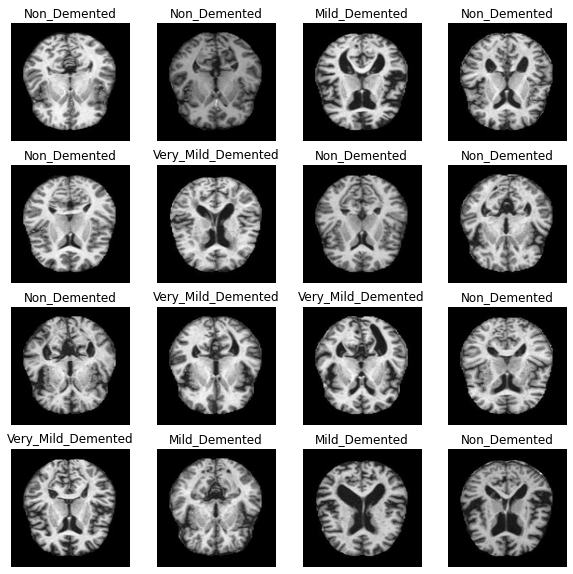

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4,4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

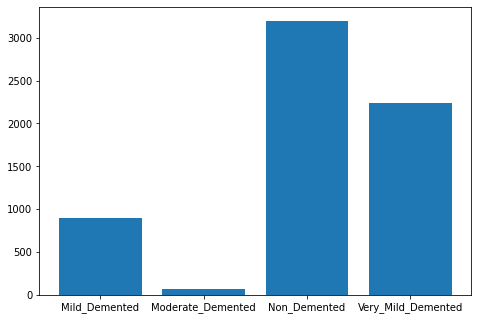

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

CNN 1


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [10]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
80/80 [==============================] - 27s 329ms/step - loss: 1.4167 - accuracy: 0.4851 - val_loss: 1.0728 - val_accuracy: 0.5086
Epoch 2/10
80/80 [==============================] - 23s 285ms/step - loss: 0.9575 - accuracy: 0.5480 - val_loss: 0.9504 - val_accuracy: 0.5352
Epoch 3/10
80/80 [==============================] - 24s 302ms/step - loss: 0.9210 - accuracy: 0.5702 - val_loss: 0.8438 - val_accuracy: 0.6401
Epoch 4/10
80/80 [==============================] - 24s 294ms/step - loss: 0.8517 - accuracy: 0.6179 - val_loss: 0.8396 - val_accuracy: 0.5806
Epoch 5/10
80/80 [==============================] - 24s 294ms/step - loss: 0.7973 - accuracy: 0.6413 - val_loss: 0.7237 - val_accuracy: 0.6917
Epoch 6/10
80/80 [==============================] - 24s 300ms/step - loss: 0.7231 - accuracy: 0.6890 - val_loss: 0.6928 - val_accuracy: 0.7230
Epoch 7/10
80/80 [==============================] - 24s 295ms/step - loss: 0.6300 - accuracy: 0.7290 - val_loss: 0.5678 - val_accuracy: 0.7590

In [11]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

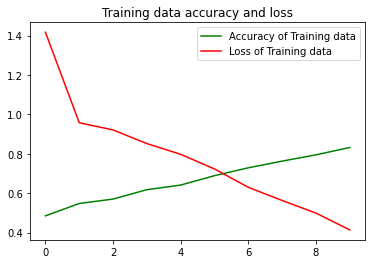

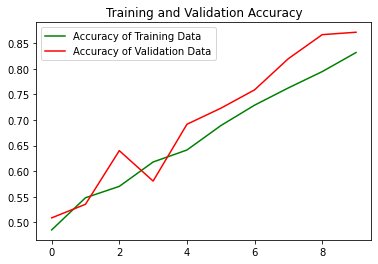

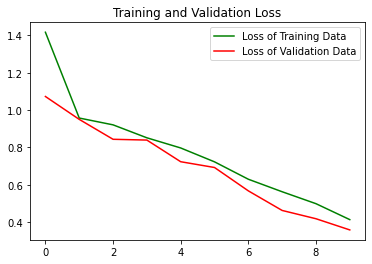

<Figure size 432x288 with 0 Axes>

In [12]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 1s 67ms/step - loss: 0.3771 - accuracy: 0.8489


1/1 [==============================] - 0s 24ms/step


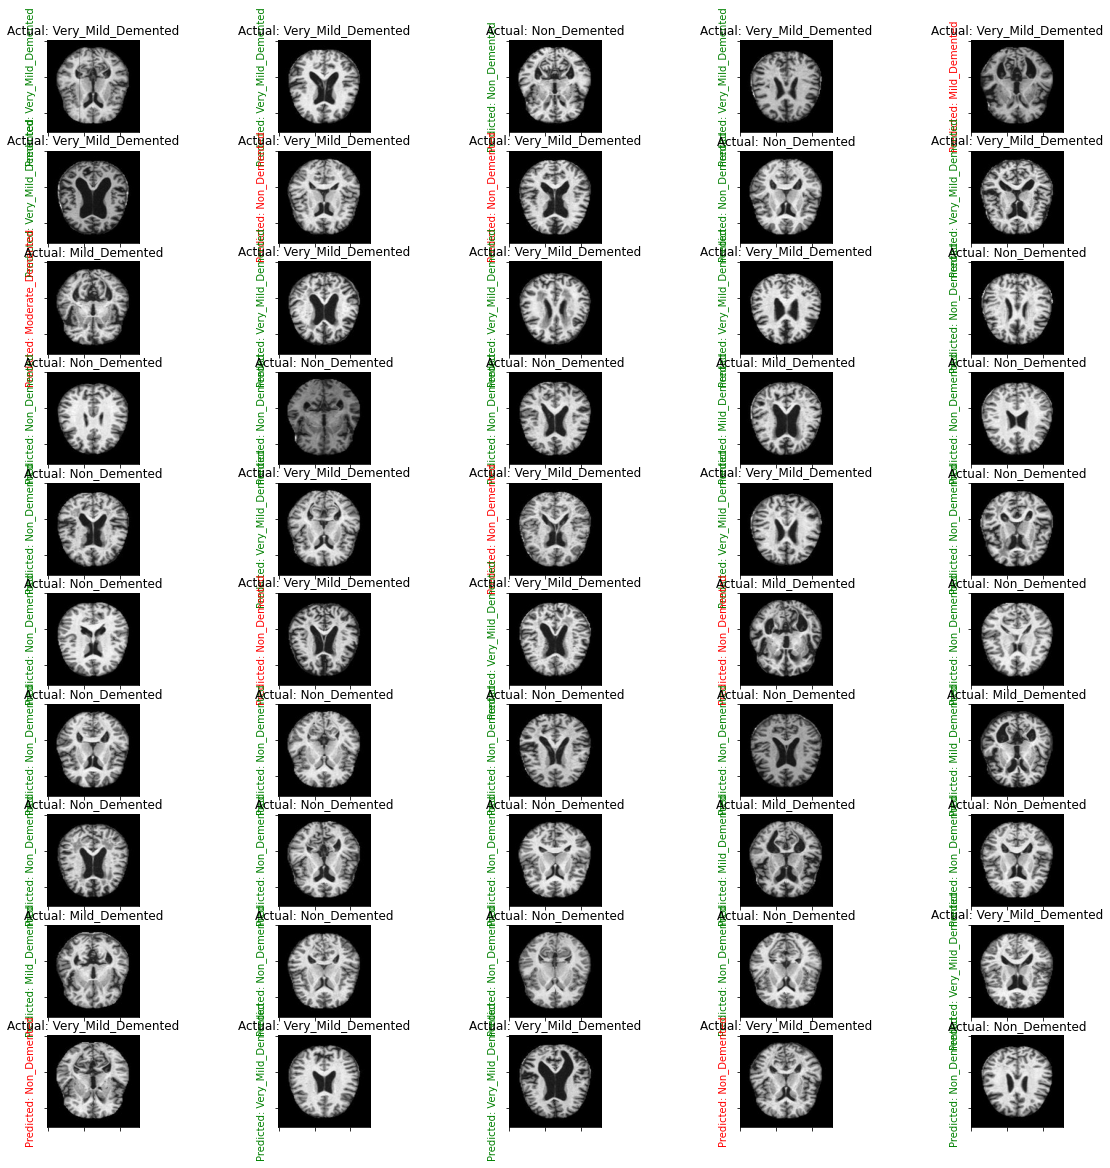

In [14]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(50):
        ax = plt.subplot(10, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [15]:
Accuracy  = accuracy *100
print("Accuracy of the model: ",Accuracy,"%")

Accuracy of the model:  84.89096760749817 %


CNN 2

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [19]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
80/80 [==============================] - 28s 337ms/step - loss: 1.1802 - accuracy: 0.4970 - val_loss: 0.9871 - val_accuracy: 0.5086
Epoch 2/10
80/80 [==============================] - 25s 309ms/step - loss: 0.9230 - accuracy: 0.5548 - val_loss: 0.8601 - val_accuracy: 0.6275
Epoch 3/10
80/80 [==============================] - 24s 304ms/step - loss: 0.8477 - accuracy: 0.6101 - val_loss: 0.7508 - val_accuracy: 0.6667
Epoch 4/10
80/80 [==============================] - 24s 295ms/step - loss: 0.7559 - accuracy: 0.6576 - val_loss: 0.7463 - val_accuracy: 0.6651
Epoch 5/10
80/80 [==============================] - 24s 298ms/step - loss: 0.6711 - accuracy: 0.7126 - val_loss: 0.5655 - val_accuracy: 0.7684
Epoch 6/10
80/80 [==============================] - 24s 300ms/step - loss: 0.5513 - accuracy: 0.7671 - val_loss: 0.4521 - val_accuracy: 0.8341
Epoch 7/10
80/80 [==============================] - 24s 303ms/step - loss: 0.4447 - accuracy: 0.8166 - val_loss: 0.3923 - val_accuracy: 0.8638

In [20]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 1s 63ms/step - loss: 0.2032 - accuracy: 0.9393


In [21]:
Accuracy =accuracy*100
Accuracy

93.92523169517517

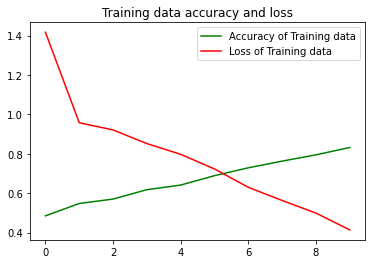

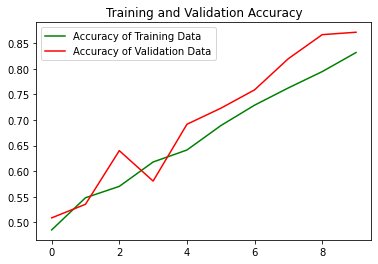

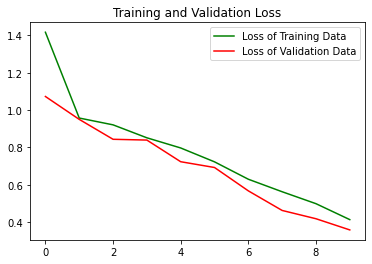

<Figure size 432x288 with 0 Axes>

In [22]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

1/1 [==============================] - 0s 16ms/step


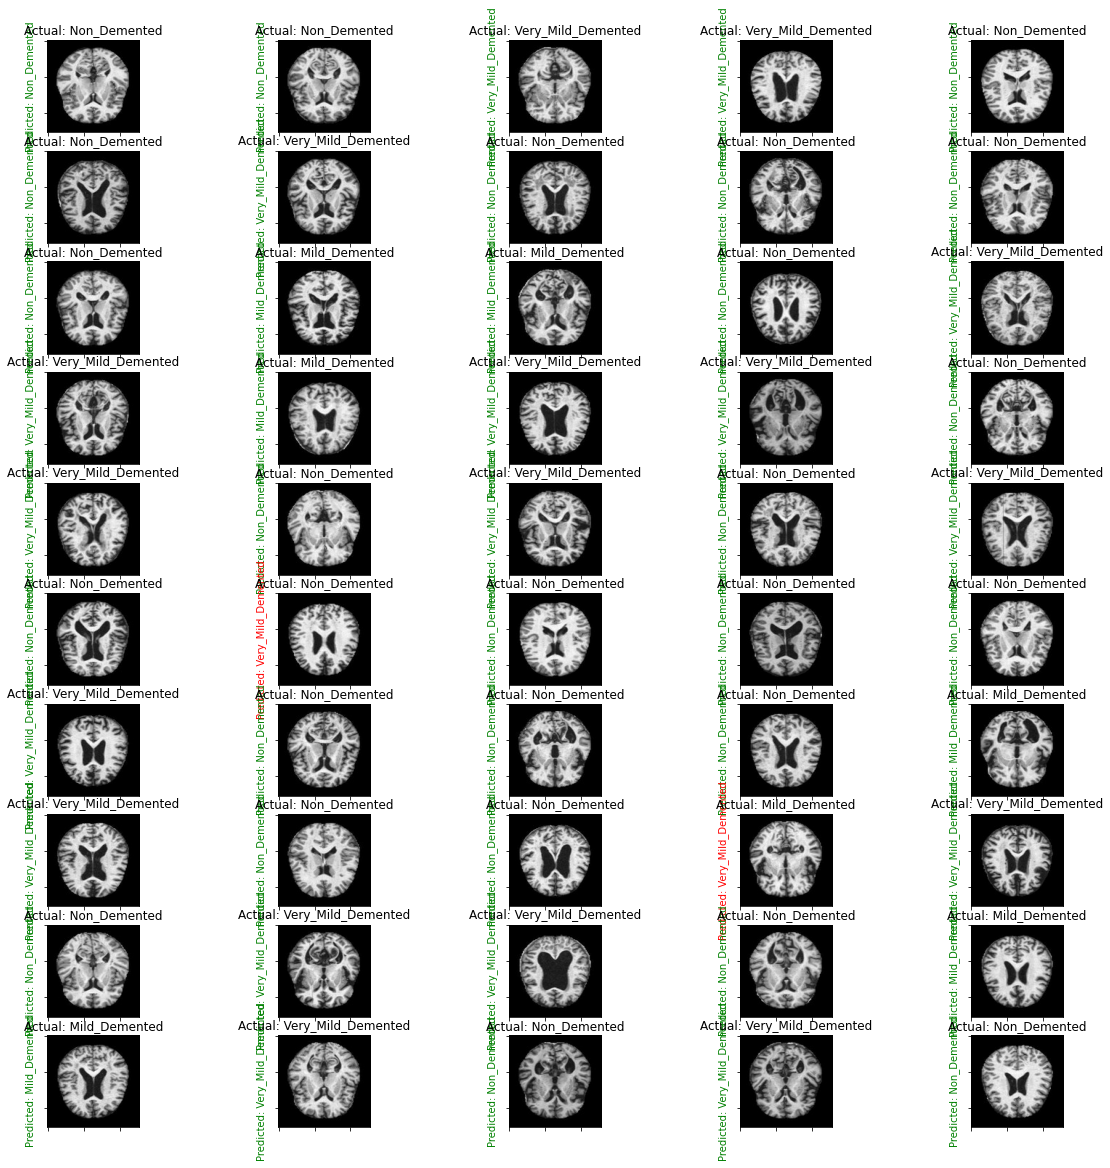

In [23]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(50):
        ax = plt.subplot(10, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

RNN

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [25]:
import pathlib
data_dir = pathlib.Path('./Dataset/')

In [26]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6400


In [27]:
batch_size = 64 #32
img_height = 128 #180
img_width = 128  #180

In [28]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.


In [29]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="testing",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

In [30]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


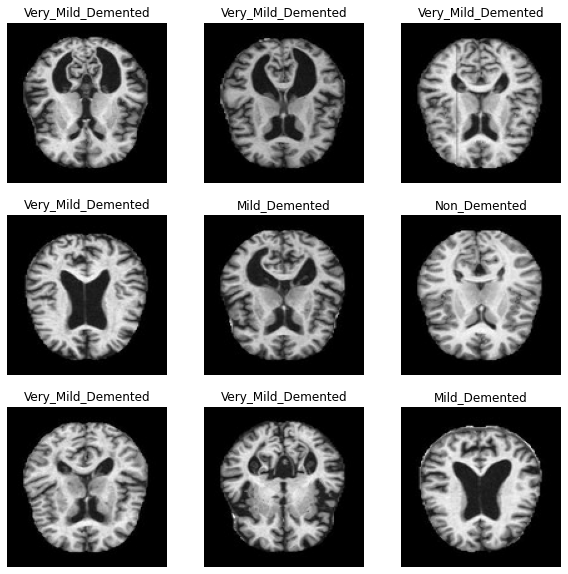

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 128, 128, 3)
(64,)


In [34]:
normalization_layer = layers.Rescaling(1./255)

In [35]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.9176471


In [36]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)       

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# history = model.fit(train_ds,validation_data=val_ds,epochs=1)

Epoch 1/10
80/80 [==============================] - 25s 306ms/step - loss: 1.0496 - accuracy: 0.5029 - val_loss: 0.9250 - val_accuracy: 0.5352
Epoch 2/10
80/80 [==============================] - 26s 319ms/step - loss: 0.9192 - accuracy: 0.5660 - val_loss: 0.8834 - val_accuracy: 0.5555
Epoch 3/10
80/80 [==============================] - 24s 295ms/step - loss: 0.8073 - accuracy: 0.6346 - val_loss: 0.7492 - val_accuracy: 0.6477
Epoch 4/10
80/80 [==============================] - 23s 291ms/step - loss: 0.6503 - accuracy: 0.7119 - val_loss: 0.6038 - val_accuracy: 0.7258
Epoch 5/10
80/80 [==============================] - 24s 297ms/step - loss: 0.4737 - accuracy: 0.8002 - val_loss: 0.5919 - val_accuracy: 0.7352
Epoch 6/10
80/80 [==============================] - 24s 304ms/step - loss: 0.3082 - accuracy: 0.8855 - val_loss: 0.3236 - val_accuracy: 0.8734
Epoch 7/10
80/80 [==============================] - 27s 333ms/step - loss: 0.2178 - accuracy: 0.9207 - val_loss: 0.2692 - val_accuracy: 0.8922

In [40]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 1s 67ms/step - loss: 0.0454 - accuracy: 0.9860


In [41]:
Accuracy = accuracy*100
Accuracy

98.5981285572052

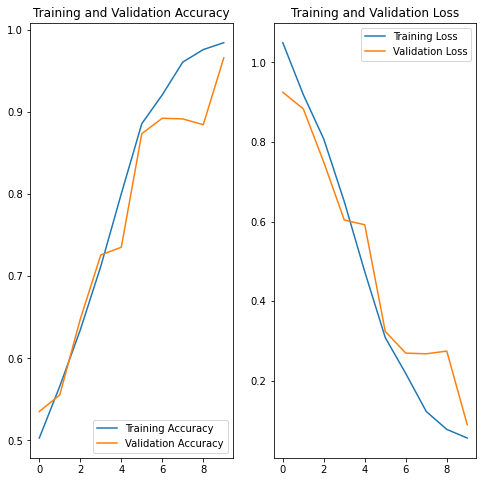

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
import warnings
warnings.simplefilter("ignore")
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

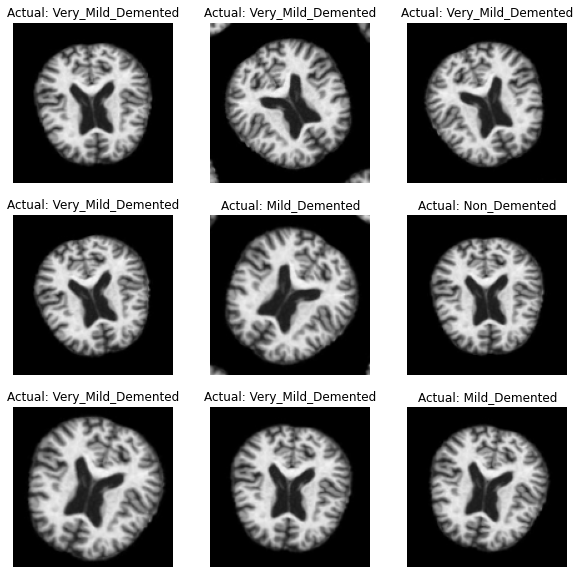

In [44]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.title("Actual: "+class_names[labels[i]])
    plt.axis("off")


1/1 [==============================] - 0s 16ms/step


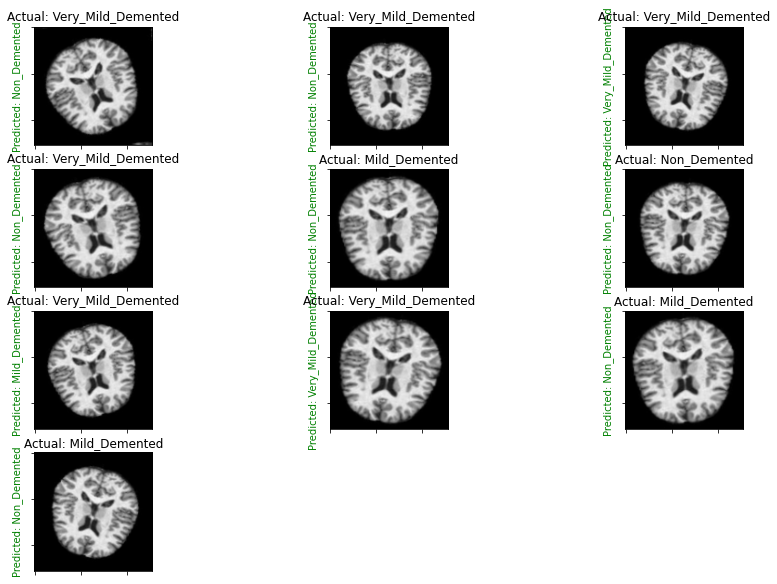

In [59]:
plt.figure(figsize=(15, 10))
for images, _ in test_ds.take(1):
  for i in range(10):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(4,3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      predictions = model.predict(tf.expand_dims(images[i], 0))
      score = tf.nn.softmax(predictions[0])
      if(class_names[labels[i]]==class_names[np.argmax(score)]):
          plt.title("Actual: "+class_names[labels[i]])
          plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})         
      else:
          plt.title("Actual: "+class_names[labels[i]])
          plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
      plt.gca().axes.yaxis.set_ticklabels([])        
      plt.gca().axes.xaxis.set_ticklabels([])


In [56]:
from PIL import Image
 
# creating a object
im = Image.open(r"./RNN.jpg")
 
im.show()